Very often we have tasks about image classification or some object recognition tasks from images and so on. To solve such problems we need images datasets and very often we need to preprocess these images to get a better result. 

There are several good libraries in python to work with images, one of them is Pillow. There are lots of useful methods in `Image` module.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Write/Read/Show images

First of all we need to read image and we can use `open()` function from `Image` module. We should pass image path to this function.

In [2]:
from PIL import Image 

img = Image.open('/content/drive/MyDrive/Rango/data/puppy.jpg')

Usually we can use `img.show()` to display image but this function doesn't work in colab/jupyter so let's run just `img`

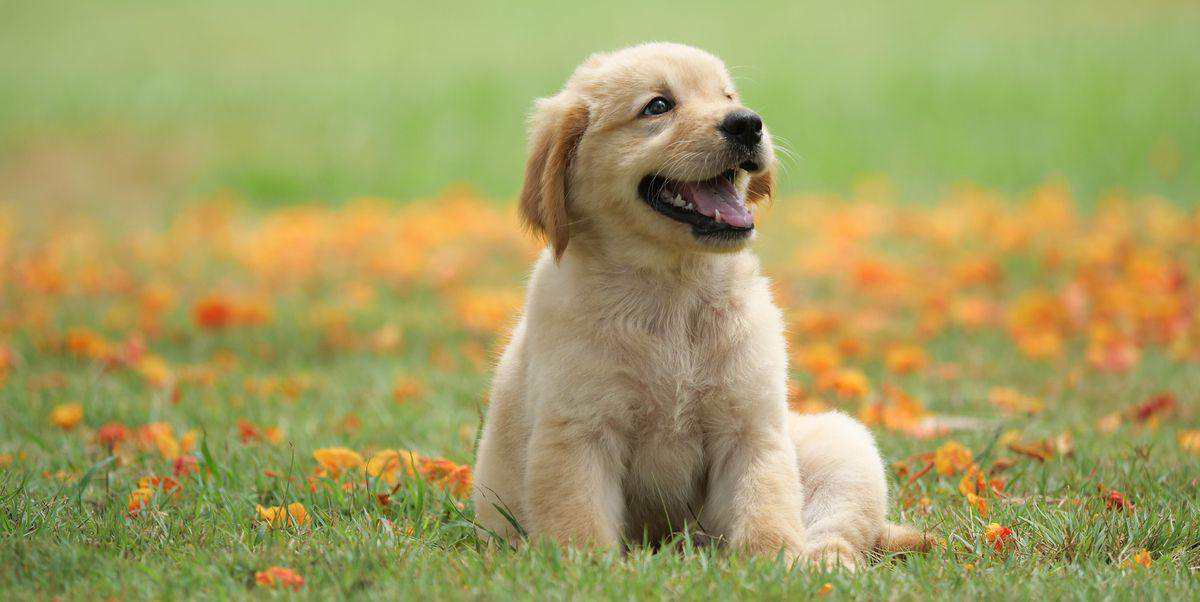

In [3]:
img

If we want to save an image, we should use `save()` method and we should pass path of image to this method. 

In [4]:
img.save('/content/drive/MyDrive/Rango/data/puppy.png')

#### Image Details

We can check some parameters of image:

image dimensions (in pixels)

In [5]:
img.size

(1200, 602)

image width:

In [6]:
img.width

1200

image height:

In [7]:
img.height

602

image format:

In [8]:
img.format

'JPEG'

format of colors:

In [9]:
img.mode

'RGB'

Image path:

In [10]:
img.filename

'/content/drive/MyDrive/Rango/data/puppy.jpg'

#### Resize:

When we want to use images dataset for training, all images should have the same size. Also bigger size images needs more time for training so sometimes we need to resize photos. We have `resize()` function for this. We should pass image as tuple and it will return copy of image with new sizes.

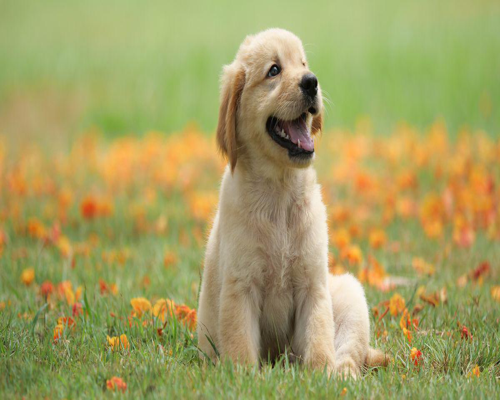

In [11]:
img.resize((500, 400))

`resize()` function doesn't care about proportions of image so if we won't think about it, result image may be streched along any axes.

We can use `thumbnail()` function, we should pass max_height and max_width to it and it will change image size with some proportions. So `min(maxwidth/width, maxheight/height)` will be scale to calculate new size of image. `thumbnail()` method doesn't do a copy of original image so if we'll need an original image in the future, we should save it.

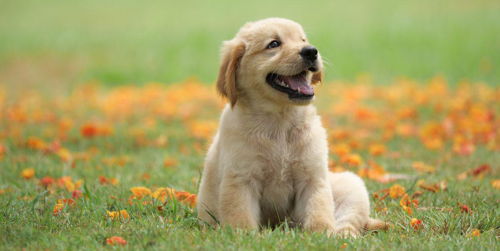

In [12]:
img_copy = img.copy()            
img_copy.thumbnail((500, 400))  
img_copy

In [13]:
img_copy.size

(500, 251)

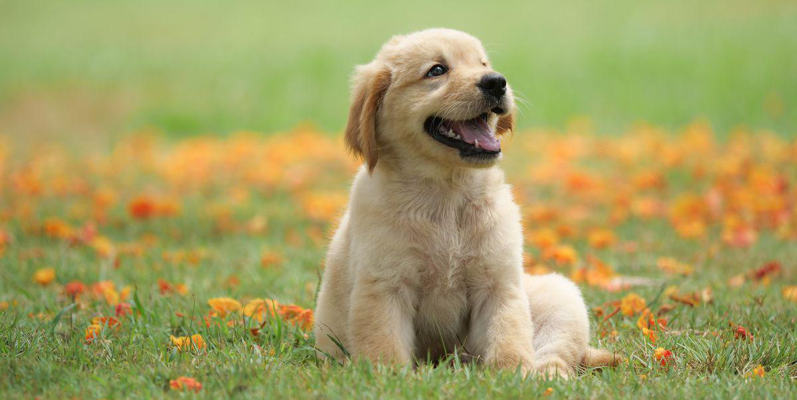

In [14]:
img_copy = img.copy()
scale = max(500/img.width, 400/img.height)              # scale
img_copy.thumbnail((img.width*scale, img.height*scale)) 
img_copy

In [15]:
img_copy.size

(797, 400)

We got a proportinal image with the dimensions that we wanted, now we should crop an image that we need. 

There is `crop()` method that we'll use to reach our goal. We should pass 4 parameters(numbers as tuples): first two numbers are coordinates of upper left corner and last two numbers are coordinates of lower right corner.

Usually the most important part of image is located in the center so let's crop central (500, 400) image. 

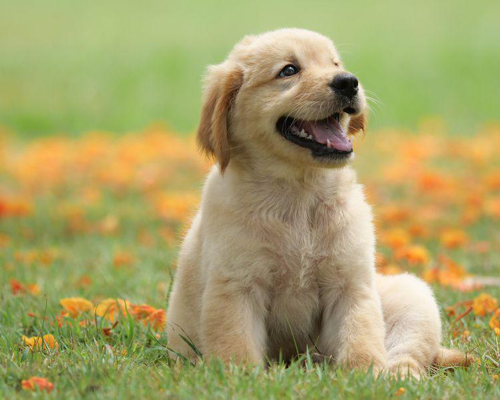

In [16]:
left = (img_copy.width - 500)/2
right = (img_copy.width + 500)/2
top = 0
bottom = img_copy.height

cropped = img_copy.crop((left, top, right, bottom))
cropped

In [17]:
cropped.size

(500, 400)

#### Generate new images

We don't have as much images as we need usually so we should try image augmentation process. We can rotate images using `rotate()` function, we should pass rotation angle(in degrees) and returns rotated(counterclockwise direction) copy of original image.

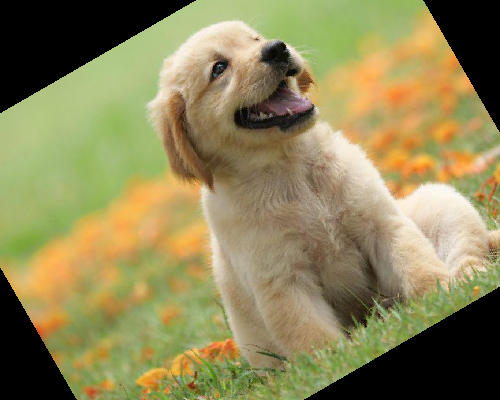

In [18]:
cropped.rotate(30)

As we see some parts of images are croped, if we want to avoid this, we should use `expand=True` parameter.

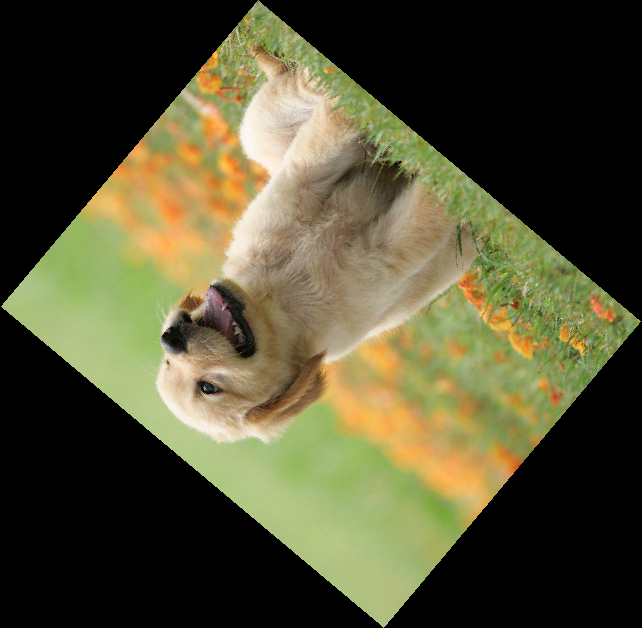

In [19]:
rotated = cropped.rotate(140, expand=True)
rotated

In [20]:
rotated.size

(642, 628)

Another methods we can use for image augmentation:

სინთეტიკური მონაცემების შესაქმნელად ასევე სურათებს ვერტიკალურად, ჰორიზონტალურად და დიაგონალების გასწვრივ ატრიალებენ. ამისათვის ვიყენებთ `transpose()` ფუნქციას, რომელსაც გადაეცემა ამათგან ერთ-ერთი:
* `PIL.Image.FLIP_LEFT_RIGHT` - horizontal flip
* `PIL.Image.FLIP_TOP_BOTTOM` - vertical flip
* `PIL.Image.ROTATE_90` - rotate counterclockwise direction by 90 degrees 
* `PIL.Image.ROTATE_180` - rotate counterclockwise direction by 180 degrees 
* `PIL.Image.ROTATE_270` - rotate counterclockwise direction by 270 degrees 
* `PIL.Image.TRANSPOSE` - image transpose
* `PIL.Image.TRANSVERSE` - image transverse

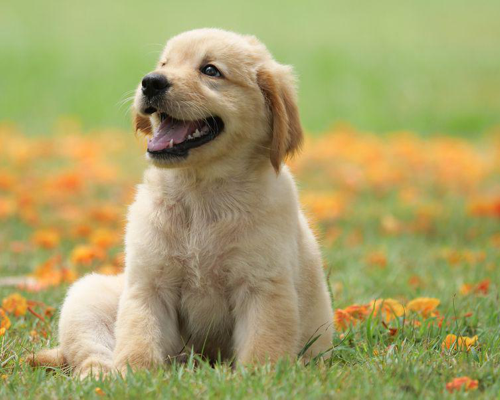

In [21]:
cropped.transpose(Image.FLIP_LEFT_RIGHT)

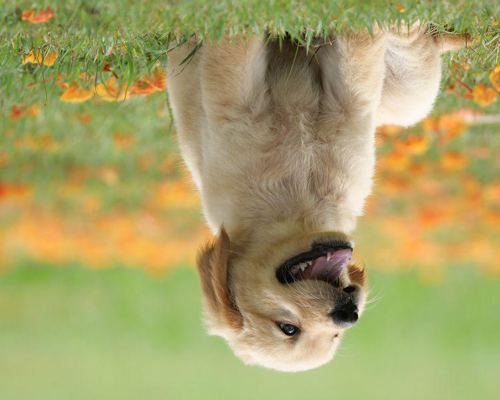

In [22]:
cropped.transpose(Image.FLIP_TOP_BOTTOM)

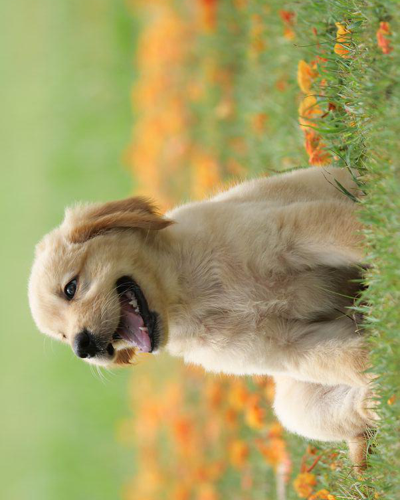

In [23]:
cropped.transpose(Image.TRANSPOSE)

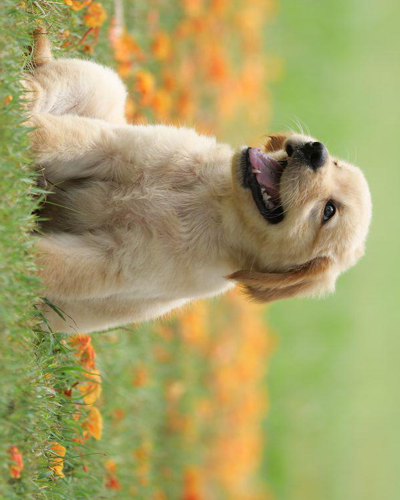

In [24]:
cropped.transpose(Image.TRANSVERSE)

Affine transformation is one more way for image augmentation. Points, lines, and line parallelisms are maintained during the affine transformation. In fact rotation, flip and scaling are some type of affine transformations.
Let's consider another type of affine transformation - shear mapping. Matrix for this transform is identity matrix but we change one zero value to some value. Usually for image transformations we use horizontan and vertical shear.

Horizontal:
$$\begin{bmatrix} 1 & s_{h} & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$ 
Using this transform $(x, y)$ point becomes $(x+s_hy, y)$ point

Vertical:
$$\begin{bmatrix} 1 & 0 & 0 \\ s_{v} & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$ 
Using this transform $(x, y)$ point becomes $(x, s_vx+y)$ point
  
to get them we do dot product of $(x, y, 1)$ vector ($(x, y)$ Homogeneous point coordinates - used in projection geometry) and transformation matrix(from right)



For this transformations we use `tranform()` method. We should pass image size that we want to get(empty places will be filled by zeros, so they will be black), `method=Image.AFFINE` and `data`(6 numbers - first 2 rows(last row always is $\begin{bmatrix} 0 & 0 & 1 \end{bmatrix}$)). But when we pass $(a, b, c, d, e, f)$ as additional data, this transformation matrix is the matrix that converts $(x, y)$ from result image to $(a x + b y + c, d x + e y + f)$ point of initial image, not vice versa(as it should be), so we should pass inversed transformation matrix as additional data.

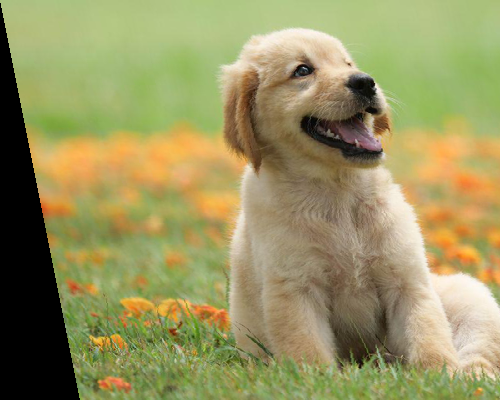

In [25]:
import numpy as np

transform = np.array([[1, 0.2, 0], [0, 1, 0], [0, 0, 1]])    # horizontal shear transform matrix 
transform_inv = np.linalg.inv(transform)                     # inversed transform matrix 
data = np.append(transform_inv[0], transform_inv[1])         # first two row of inversed matrix as one array 
cropped.transform(cropped.size, method=Image.AFFINE, data=data)   # transform

As we see image is bigger than given size so we can pass bigger size or reduce result image. We can combine shear and scaling in one matrix:

$$\begin{bmatrix} s_x & 0 & 0 \\ 0 & s_y & 0 \\ 0 & 0 & 1 \end{bmatrix}$$ 

Using this transform $(x, y)$ point converts to $(s_x x, s_y y)$ point

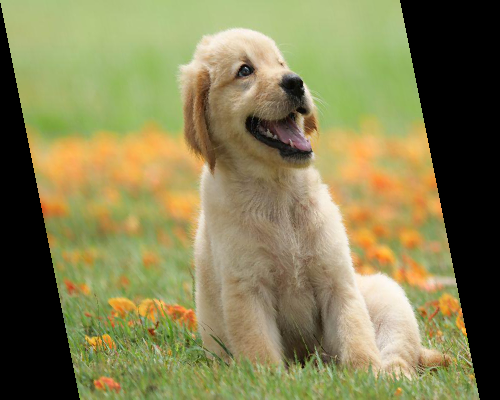

In [26]:
transform = np.array([[0.8, 0.2, 0], [0, 1, 0], [0, 0, 1]])    # horizontal shear and reduction transform matrix
transform_inv = np.linalg.inv(transform)                     
data = np.append(transform_inv[0], transform_inv[1])         
cropped.transform(cropped.size, method=Image.AFFINE, data=data)   

We can combine vertical shear too

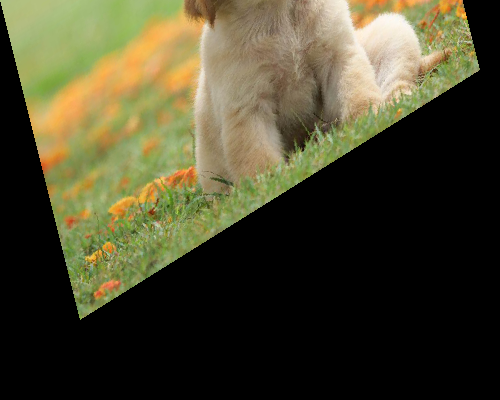

In [27]:
transform = np.array([[0.8, 0.2, 0], [-0.5, 0.8, 0], [0, 0, 1]])    # horizontal shear, vertical shear and reduction transforms
transform_inv = np.linalg.inv(transform)                     
data = np.append(transform_inv[0], transform_inv[1])         
cropped.transform(cropped.size, method=Image.AFFINE, data=data)

As we had negative vertical shear coefficient, some pixels in result were negative and they are not in the result. We can add translation transform to fix this problem:

$$\begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \\ 0 & 0 & 1 \end{bmatrix}$$ 
Using this transform point $(x, y)$ becomes point $(x+t_x, y+t_y)$

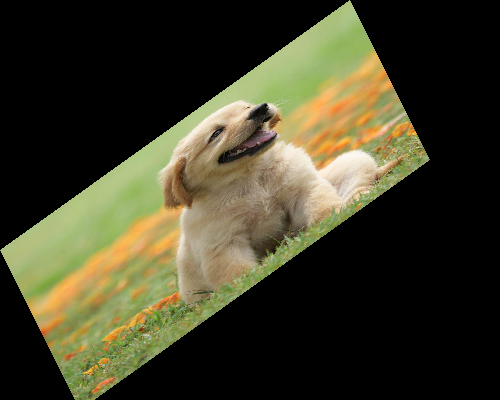

In [28]:
transform = np.array([[0.7, 0.2, 0], [-0.5, 0.4, 250], [0, 0, 1]])    # horizontal shear, vertical shear, reduce, translation
transform_inv = np.linalg.inv(transform)                     
data = np.append(transform_inv[0], transform_inv[1])         
cropped.transform(cropped.size, method=Image.AFFINE, data=data)

#### Color Transformation

As we already saw, we have RGB format photo and this means that each pixel is represented by 3 number so in fact we have 3-D photo.

In [29]:
np.array(cropped).shape

(400, 500, 3)

numpy represents (height x width), pillow represents (width x height)

Sometimes we have problem where we don't need colors to solve it so we can reduce number of elements in array 3 times and this will definitely increase speed of our model. That's why we often use greyscale images, we need only one number(instead of 3) to represent each pixel in greyscale image.

We use `convert()` function to change format of pixels and we should pass specific format to it.

Possible formats in Pillow:
* 1 - 1-bit pixel - greyscale, is saved in one bit
* L - 8-bit pixel - greyscale
* P - 8-bit pixel, it's mapped to any other format using color palette
* RGB - 3x8-bit pixel, real color
* RGBA - 4x8-bit pixel, real color with an alpha channel - which specifies the opacity of the color. When an alpha channel is associated with a given pixel has a value of 0%, such a pixel becomes completely transparent, i.e. it takes on the color of the background below it.
* CMYK - 4x8-bit pixel, refers to the four ink plates used in some color printing: cyan, magenta, yellow, and key (black)
* YCbCr - 3x8-bit pixel, colorful video format 
* LAB - 3x8-bit pixel, L*a*b color space
* HSV - 3x8-bit pixel: Hue Saturation Value
* I - 32-bit +/- signed ints as pixels
* F - 32-bit floats as pixels 


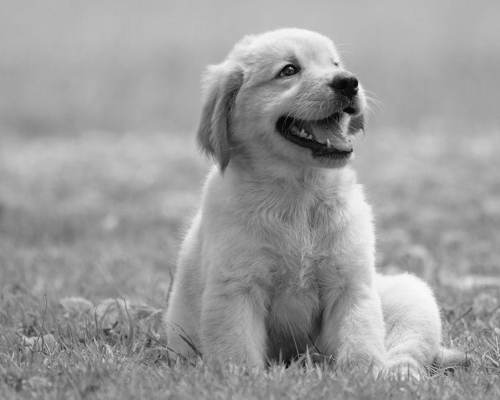

In [30]:
cropped.convert('L')

In [31]:
np.array(cropped.convert('L')).shape

(400, 500)

We converted image to grayscale and we don't have third dimension anymore

We can add transparency with `putalpha()` method. It changes original photo. We should pass L with the same dimensions as out height/width of our image or 1 format image that describes transparency for each pixel or one number that will be transparency of whole image.

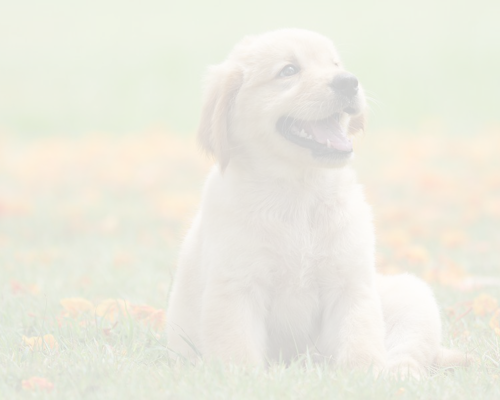

In [32]:
cp = cropped.copy()
cp.putalpha(50)  # 0-255 range, 0 - totally transparent, 255 - totally opaque
cp

#### Normalization

Normalization of images is very important part. Usually pixel values are in range of 0-255 but sometimes happens the situation where siilar images has different pixel ranges and model may refer them as different images so we need to callibrate them to range 0-1. This also reduces some noises on image. We can just devide each pixel value by 255, this want change anything on the image besides pixel values.

Pixel types of Pillow photos are `uint8` and its range is 0-255 so pillow can't work with 0-1 range pixels so we'll transform them to numpy array.

In [33]:
img_arr = np.asarray(cropped, dtype='float32')    
img_arr /= 255.0 

img_arr.min(), img_arr.max()

(0.0, 1.0)

Let's display this image using `imshow()` method

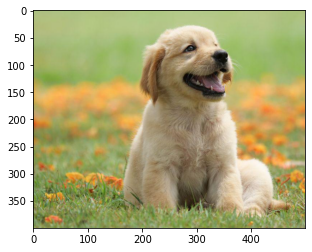

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(img_arr)
plt.show()

We have exactly the same image but its pixel values are in range 0-1

#### Strandartization

In some cases standartization may have a better result than normalization, we can do this using numpy

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


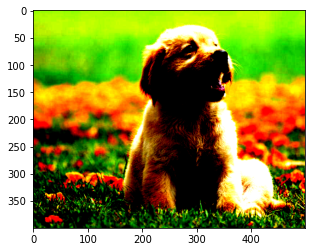

In [35]:
img_arr = np.asarray(cropped, dtype='float32')    # convert to numpy array
img_arr = (img_arr-img_arr.mean())/img_arr.std()   # standartization

plt.imshow(img_arr)

In case of standard normal distribution, average is 0 so we have negative pixels too that becomes 0 when we want to display image(so looks like black pixels) but the meaning of photo isn't lost